## Project Overview

This project will study the evolution of the measures of economic activity, namely unemployment and mean income, alongside the growth of state minimum wage within the past 30 years. Many economists theorize that if the increase in minimum wage is over the natural wage of a market it may lead to a decrease in the number of jobs available and may also lead to an increase in the costs of living. The project will analyze the relationships among California minimum wage, unemployment rate, and mean real wage (adjusted by costs of living) in Los Angeles County. We will be using a linear regression analysis to test the relationships between these variables.

## Project Structure:
The project will start by providing a data report. The data report will explain where the data comes from and how to access the data.

The second part of the project will provide summary statistics about California minimum wage, the unemployment rate trends, and mean real wage  and provide visualizations of these statistics to help further illustrate the project.

The third part of the project will state a hypothesis and compared with trends in previous scholarship. Then, a linear regression will be performed to test the hypothesis and the results will be stated. Lastly, there will be a detailed discussion of the results and how it follows or goes against previous scholarship.

## Data Report

The data for this project comes from the Federal Reserve Economic Data website (FRED). FRED provides yearly data on California minimum wage, monthly data on California unemployment rate, and yearly data on mean real wages in LA county. The data can be accessed at https://fred.stlouisfed.org.


## Key Variables
The 3 key variables in this project are minimum wage, unemployment rate and mean real wages. FRED defines minimum wage as “The federal minimum wage is the minimum hourly wage employers are required to pay employees who are eligible under the Fair Labor Standards Act (FLSA) of 1938. The FLSA was generally only applicable to employees involved in interstate commerce, either directly or through the creation of goods. Many amendments have since been added to the FLSA, expanding its coverage and raising the minimum wage. Significant amendments occurred in 1961 and in 1966, when a separate minimum wage for farm workers was established. Starting in January of 1978 the minimum wages of all eligible workers, including farm workers, were made uniform. The values in the series for non-farm workers are those for the groups initially covered under the 1938 FLSA. Many states also have minimum wage laws. Some state laws provide greater employee protections; employers must comply with both.”

The Employment Development Department (EDD) defines unemployment rate in California as “All civilians 16 years and over who did not work during the survey week, who made specific efforts to find a job within the past four weeks, and who were available to work. The unemployment rate is derived by dividing the number of unemployed by the labor force. The result is expressed as a percentage.”

FRED defines mean real wages as “Mean household wages in real U.S. Dollars from the American Community Survey 1-year estimates adjusted for cost of living using regional price parities (RPP) from the U.S. Bureau of Economic Analysis' Real Personal Income for States and Metropolitan Areas.”

In [16]:
# Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

pd.options.display.max_rows = 10 # Change number of rows in output

In [17]:
# Access Data (CA Minimum Wage)
url = 'https://fred.stlouisfed.org/series/STTMINWGCA/downloaddata/STTMINWGCA.csv'
data = pd.read_csv(url, parse_dates=True)
data.columns=['DATE','MINWAGE']
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')
data.head()

,DATE,MINWAGE
0,1968-01-01,1.65
1,1969-01-01,1.65
2,1970-01-01,1.65
3,1971-01-01,1.65
4,1972-01-01,1.65


In [18]:
# Summary Statistics for California State Minimum Wage Rate
data.describe()

,MINWAGE
count,53.000000
mean,5.166038
std,2.954084
min,1.650000
25%,3.350000
50%,4.250000
75%,7.500000
max,12.000000


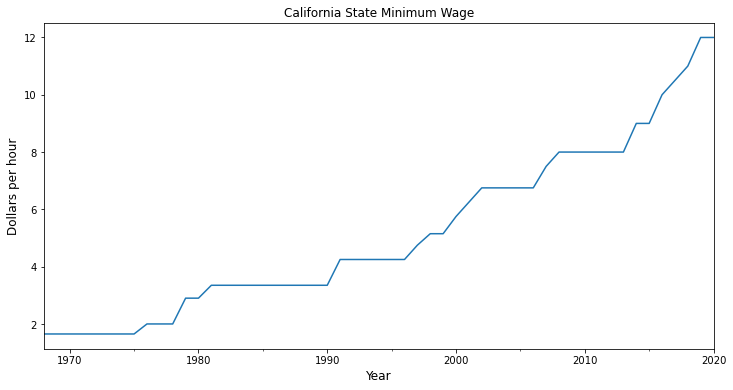

In [19]:
# Graphing the California State Minimum Wage Rate
data1 = data.set_index('DATE')
ax = data1['1968':'2020'].plot(title='California State Minimum Wage', legend=False, figsize=(12,6))
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Dollars per hour', fontsize=12)
plt.show()

In [20]:
# Access Data (LA Unemployment Rate)
url_u = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CALOSA7URN&scale=left&cosd=1990-01-01&coed=2020-09-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-11-12&revision_date=2020-11-12&nd=1990-01-01.csv'
data_u = pd.read_csv(url_u, parse_dates=True) # Note that we are importing the yearly average unemployment rate, to better fit with our other models
data_u.columns=['DATE', 'LA U RATE']
data_u['DATE'] = pd.to_datetime(data_u['DATE'], errors='coerce')
data_u.head()
data_u['LA U RATE'] = data_u['LA U RATE'].str[:6] # Changing the data to have 5 significant figures
data_u['LA U RATE'] = pd.to_numeric(data_u['LA U RATE'], errors='coerce')
print(data_u)

         DATE  LA U RATE
0  1990-01-01     5.8916
1  1991-01-01     7.9833
2  1992-01-01     9.8833
3  1993-01-01     9.9583
4  1994-01-01     9.2583
..        ...        ...
26 2016-01-01     5.2500
27 2017-01-01     4.7583
28 2018-01-01     4.6250
29 2019-01-01     4.4416
30 2020-01-01        NaN

[31 rows x 2 columns]


In [21]:
# Summary Statistics for LA Unemployment Rate
data_u.describe()

,LA U RATE
count,30.000000
mean,7.449087
std,2.361363
min,4.441600
25%,5.447900
50%,6.808300
75%,9.008300
max,12.508000


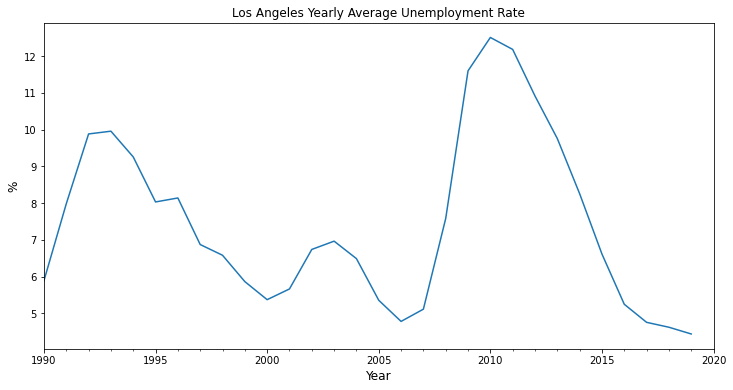

In [22]:
# Graphing LA Unemployment Rate
data_u1 = data_u.set_index('DATE')
ax = data_u1['1990':'2020'].plot(title='Los Angeles Yearly Average Unemployment Rate', legend=False, figsize=(12,6))
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

In [23]:
# Access Data (Real Mean Wage)
url_r = 'https://fred.stlouisfed.org/series/MWACL06037/downloaddata/MWACL06037.csv'
data_r = pd.read_csv(url_r, parse_dates=True)
data_r.columns=['DATE', 'REAL MEAN WAGE']
data_r['DATE'] = pd.to_datetime(data_r['DATE'], errors='coerce')
data_r.head()

,DATE,REAL MEAN WAGE
0,2009-01-01,24.86
1,2010-01-01,16.42
2,2011-01-01,15.76
3,2012-01-01,15.76
4,2013-01-01,16.00


In [24]:
# Summary Statistics for LA Real Mean Wage
data_r.describe()

,REAL MEAN WAGE
count,10.000000
mean,20.120000
std,5.068116
min,15.760000
25%,16.072500
50%,16.790000
75%,25.325000
max,27.150000


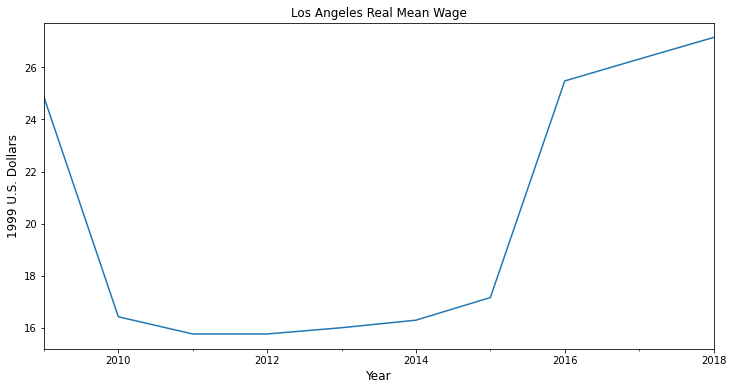

In [25]:
# Graphing Los Angeles Real Mean Wage
data_r1 = data_r.set_index('DATE')
ax = data_r1['2009':'2020'].plot(title='Los Angeles Real Mean Wage', legend=False, figsize=(12,6))
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('1999 U.S. Dollars', fontsize=12)
plt.show()

In [26]:
# Compiling data into one dataframe
res1 = pd.merge(data_u.assign(grouper=data_u['DATE'].dt.to_period('Y')), 
                   data.assign(grouper=data['DATE'].dt.to_period('Y')),
                   how = 'left', on = 'grouper') # Pandas only allows for merging of one dataset at a time

In [27]:
res2 = pd.merge(res1.assign(grouper=res1['DATE_x'].dt.to_period('Y')),
                   data_r.assign(grouper=data_r['DATE'].dt.to_period('Y')),
                   how = 'left', on = 'grouper')
del res2['grouper']
del res2['DATE_y']
del res2['DATE']

res2.describe()

,LA U RATE,MINWAGE,REAL MEAN WAGE
count,30.000000,31.000000,10.000000
mean,7.449087,7.053226,20.120000
std,2.361363,2.411463,5.068116
min,4.441600,3.350000,15.760000
25%,5.447900,4.950000,16.072500
50%,6.808300,6.750000,16.790000
75%,9.008300,8.000000,25.325000
max,12.508000,12.000000,27.150000


Regression Analysis Pt. 1

According to economic theory, should minimum wage rise too much, there may lead to an increase in unemployment rates. That is, a negative association with a higher minimum wage. On the other hand, with a lower minimum wage, there may be a decrease in unemployment rates. We will now use linear regression to test this hypothesis. We hypothesize a similar phenomenon with real mean wage and unemployment.

In [28]:
# Testing Linear Regression
res2 = res2.dropna()

X = res2[['MINWAGE', 'REAL MEAN WAGE']]
Y = res2['LA U RATE']

X = sm.add_constant(X)

model1 = sm.OLS(Y,X).fit()
predictions = model1.predict(X)

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              LA U RATE   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     27.67
Date:                Sun, 06 Dec 2020   Prob (F-statistic):           0.000475
Time:                        14:02:52   Log-Likelihood:                -14.222
No. Observations:                  10   AIC:                             34.44
Df Residuals:                       7   BIC:                             35.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             32.2811      3.304      9.

/Users/ianhu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NameError: name 'xmin' is not defined

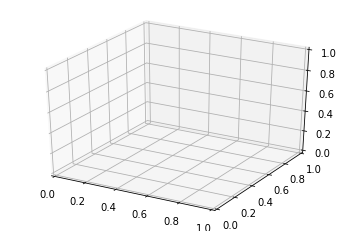

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.arange(xmin, xmax+dx, dx)
z = np.arange(zmin, zmax+dz, dz)
X, Z = np.meshgrid(x, z)
ax.plot_surface(X, Z, w1)
plt.show()

In [37]:
# Visualization of 3D Model
def f(x,y):
    return 32.2811 - 2.8610*x + 0.0980*y

x = np.linspace(0, 30, 30)
y = np.linspace(0, 30, 30)

x, y = np.meshgrid(x,y)

z = f(x, y)

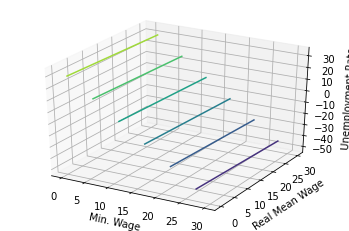

In [44]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.contour3D(x, y, z)
ax.set_xlabel('Min. Wage')
ax.set_ylabel('Real Mean Wage')
ax.set_zlabel('Unemployment Rate');

### Population and Estimated Model 1

$\widehat{LA \; Unemployment \; Rate_i} = \beta_0 + \beta_1*MinWage_i + \beta_2*RealMeanWage_i + \varepsilon_i$
$\widehat{LA \; Unemployment \; Rate_i} = 32.3811 - 2.8610*MinWage_i + 0.0980*RealMeanWage_i + \varepsilon_i$

### Analysis of the Estimated Model 1

As seen from our estimated model, we see that

$\hat{\beta_0}$ = 32.2811, $\hat{\beta_1}$ = -2.8610, $\hat{\beta_2}$ = 0.0980, $R^2$ = 0.888

The intercept $\hat{\beta_0}$, holding MinWage and RealMeanWage equal to 0, estimates a LA Unemployment Rate of 32.2811%, however, this is not significant as 0 is outside of the min and max of MinWage and RealMeanWage, [1.65,12] and [15.76, 27.15], respectively.

The covariate, $\hat{\beta_1}$, implies that a unit increase in MinWage estimates a -2.8610 change in LA Unemployment Rate. Since our p-value = 0.001, we conclude that MinWage is statistically significant in our model (with 95% confidence). California Minimum Wage has a negative effect on LA Unemployment Rate. That is to say, within our model, increasing minimum wage will decrease the unemployment rate.

The other covariate, $\hat{\beta_2}$, implies that a unit increase in RealMeanWage estimates a 0.0980 change in LA Unemployment Rate. However, since our p-value = 0.448, we conclude that RealMeanWage is not statistically significant. This means that although our estimate = 0.0980, we cannot be confident that the true effect of RealMeanWage on LA Unemployment Rate is not zero. As such, RealMeanWage should not be in our model.

In regards to $R^2$, approximately 88.8% of the variation in LA's Unemployment Rate is explained by California's Minimum Wage and LA County's Real Mean Wage.

Despite all this, however, it is important to note that FRED has only been tracking CA RealMeanWage from 2009 to 2018, and as such, the pandas dataset excludes all rows that contain cells with NaN. Consequently, our linear regression model only looks at the observations from 2009 to 2018, not the entire span of FRED's tracking of CA Minimum Wage.

In [ ]:
del res1['grouper']
del res1['DATE_y']

In [ ]:
# Testing Linear Regression 2

res1.dropna(inplace=True)
X1 = res1['MINWAGE']
Y1 = res1['LA U RATE']

X1 = sm.add_constant(X1)

model2 = sm.OLS(Y1,X1).fit()
predictions1 = model2.predict(X1)

print(model2.summary())

In [ ]:
# Visualization of 2D Model
plt.plot(res1['MINWAGE'], res1['LA U RATE'], 'o')
plt.title('LA County Unemployment Rate ~ CA Minimum Wage from 1990 to 2019')
plt.xlabel('CA Minimum Wage (in 2020 USD)')
plt.ylabel('Unemployment Rate (%)')

m, b = np.polyfit(res1['MINWAGE'], res1['LA U RATE'], 1)
plt.text(10, 9, r'8.84 - 0.20x')
plt.plot(res1['MINWAGE'], m*res1['MINWAGE'] + b)
plt.show()

### Population and Estimated Model 2

$\widehat{LA \; Unemployment \; Rate_i} = \beta_0 + \beta_1*MinWage_i + \varepsilon_i$

$\widehat{LA \; Unemployment \; Rate_i} = 8.8389 - 0.2018*MinWage_i + \varepsilon_i$

### Analysis of the Estimated Model 2

As seen from our estimated model, we see that

$\hat{\beta_0}$ = 8.8389, $\hat{\beta_1}$ = -0.2018, $R^2$ = 0.038

Now, looking at simply Unemployment ~ Minimum Wage through a wider length of time, we see that things change greatly.

At a mimimum wage of zero dollars, our model predict an unemployment rate of 8.8%. A dollar increase in minimum wage predicts a -0.20 change in LA Unemployment Rate. However, as our p-value = 0.305, we conclude that minimum wage is not statistically significant. We cannot conclude that the true proportion of minimum wage is not zero. 

In regards to $R^2$, approximately 3.8% of the variation in LA's Unemployment Rate is explained by California's Minimum Wage and LA County's Real Mean Wage. Our model with simply minimum wage and unemployment does not explain much.

## Concluding Remarks

In conclusion, after running linear regression on both of these models and analyzing the datasets, we have only begun to show how complex unemployment is. Whether unemployment increases or decreases can not be attributed to just one or two factors, barring extreme circumstances such as a global pandemic or a major recession/financial collapse. Unemployment rates usually only significantly change in the long term and can depend on multiple outstanding factors not included in our datasets. Some examples of these confounding variables include the flux of workers entering and leaving the labor force, changes in what labor is demanded (such as a shift towards technology), and globalization (outsourcing/offshoring work). Even public policies such as the Federal interest rates and differing levels of unemployment benefits have a distinct effect on unemployment. Additionally, speaking towards endogeneity, these kinds of economic relationships can be difficult to analyze as explanatory variables may be affected by the response, or perhaps they are jointly affected by (a) confounding variable(s). That is, to say, economic variables can often be correlated and may not completely independent of one another. We still have yet to understand unemployment, thus our hypothesis is not yet confirmed.

In regards to our chosen data, The FRED dataset for Real Mean Wage was only about 10 years old. Consequently, it was difficult to practically conclude or see anything beyond a statistically significant relationship. For the 2nd model with just minimum wage, the p-value was large and not statistically significant for this model most likely due to the many factors outlined above that affect unemployment. Minimum wage is just one of many factors that have an influence. Minimum wage alone is not enough to explain the variation in unemployment but with real mean wage added in the model we see a more significant relationship, thus supporting the notion that unemployment requires multiple factors to be considered to be correctly analyzed.  